In [1]:
%matplotlib inline

In [2]:
from fastai.vision import *

# MNIST CNN

We'll look into more of the datablock api here

In [3]:
path = untar_data(URLs.MNIST)

NameError: name 'untar_data' is not defined

In [3]:
from fastai import * # Same thing as lesson 6 - need to import some basic functions

In [4]:
path = untar_data(URLs.MNIST)

In [5]:
path

PosixPath('/home/jupyter/.fastai/data/mnist_png')

In [7]:
path.ls()

[PosixPath('/home/jupyter/.fastai/data/mnist_png/testing'),
 PosixPath('/home/jupyter/.fastai/data/mnist_png/training')]

In [5]:
# Here ImageItemList fn internally calls PIL (python imaging library).
# Since all the images are bnw rather than RGB, we supply convert_mode
il = ImageItemList.from_folder(path, convert_mode = 'L')

So the workflow here would be to first create the ItemList, where the library takes the file names from the folder. And then, you tell it to split the dataset into two parts - training and testing. And afterwards, you label it using appropriate functions

In [10]:
il

ImageItemList (70000 items)
[Image (1, 28, 28), Image (1, 28, 28), Image (1, 28, 28), Image (1, 28, 28), Image (1, 28, 28)]...
Path: /home/jupyter/.fastai/data/mnist_png

In [11]:
il.items[0]

PosixPath('/home/jupyter/.fastai/data/mnist_png/testing/8/6327.png')

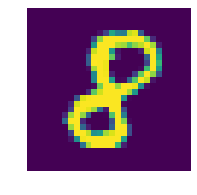

In [13]:
il[0].show()

In [6]:
defaults.cmap = 'binary'

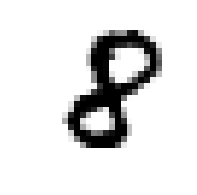

In [15]:
il[0].show()

In [7]:
# Note that here 'testing' filename is not actually a test set
# It has labels which is used to check whether the model is working or not
# In other words, a validation set
sd = il.split_by_folder(train = 'training', valid = 'testing')

In [17]:
sd

ItemLists;

Train: ImageItemList (60000 items)
[Image (1, 28, 28), Image (1, 28, 28), Image (1, 28, 28), Image (1, 28, 28), Image (1, 28, 28)]...
Path: /home/jupyter/.fastai/data/mnist_png;

Valid: ImageItemList (10000 items)
[Image (1, 28, 28), Image (1, 28, 28), Image (1, 28, 28), Image (1, 28, 28), Image (1, 28, 28)]...
Path: /home/jupyter/.fastai/data/mnist_png;

Test: None

In [9]:
(path/'training').ls()

[PosixPath('/home/jupyter/.fastai/data/mnist_png/training/8'),
 PosixPath('/home/jupyter/.fastai/data/mnist_png/training/0'),
 PosixPath('/home/jupyter/.fastai/data/mnist_png/training/3'),
 PosixPath('/home/jupyter/.fastai/data/mnist_png/training/7'),
 PosixPath('/home/jupyter/.fastai/data/mnist_png/training/4'),
 PosixPath('/home/jupyter/.fastai/data/mnist_png/training/5'),
 PosixPath('/home/jupyter/.fastai/data/mnist_png/training/2'),
 PosixPath('/home/jupyter/.fastai/data/mnist_png/training/9'),
 PosixPath('/home/jupyter/.fastai/data/mnist_png/training/1'),
 PosixPath('/home/jupyter/.fastai/data/mnist_png/training/6')]

In [19]:
(path/'testing').ls()

[PosixPath('/home/jupyter/.fastai/data/mnist_png/testing/8'),
 PosixPath('/home/jupyter/.fastai/data/mnist_png/testing/0'),
 PosixPath('/home/jupyter/.fastai/data/mnist_png/testing/3'),
 PosixPath('/home/jupyter/.fastai/data/mnist_png/testing/7'),
 PosixPath('/home/jupyter/.fastai/data/mnist_png/testing/4'),
 PosixPath('/home/jupyter/.fastai/data/mnist_png/testing/5'),
 PosixPath('/home/jupyter/.fastai/data/mnist_png/testing/2'),
 PosixPath('/home/jupyter/.fastai/data/mnist_png/testing/9'),
 PosixPath('/home/jupyter/.fastai/data/mnist_png/testing/1'),
 PosixPath('/home/jupyter/.fastai/data/mnist_png/testing/6')]

In [8]:
ll = sd.label_from_folder() # Labelling using the folder names

In [22]:
ll

LabelLists;

Train: LabelList
y: CategoryList (60000 items)
[Category 8, Category 8, Category 8, Category 8, Category 8]...
Path: /home/jupyter/.fastai/data/mnist_png
x: ImageItemList (60000 items)
[Image (1, 28, 28), Image (1, 28, 28), Image (1, 28, 28), Image (1, 28, 28), Image (1, 28, 28)]...
Path: /home/jupyter/.fastai/data/mnist_png;

Valid: LabelList
y: CategoryList (10000 items)
[Category 8, Category 8, Category 8, Category 8, Category 8]...
Path: /home/jupyter/.fastai/data/mnist_png
x: ImageItemList (10000 items)
[Image (1, 28, 28), Image (1, 28, 28), Image (1, 28, 28), Image (1, 28, 28), Image (1, 28, 28)]...
Path: /home/jupyter/.fastai/data/mnist_png;

Test: None

In [25]:
ll.train

LabelList
y: CategoryList (60000 items)
[Category 8, Category 8, Category 8, Category 8, Category 8]...
Path: /home/jupyter/.fastai/data/mnist_png
x: ImageItemList (60000 items)
[Image (1, 28, 28), Image (1, 28, 28), Image (1, 28, 28), Image (1, 28, 28), Image (1, 28, 28)]...
Path: /home/jupyter/.fastai/data/mnist_png

In [26]:
ll.valid

LabelList
y: CategoryList (10000 items)
[Category 8, Category 8, Category 8, Category 8, Category 8]...
Path: /home/jupyter/.fastai/data/mnist_png
x: ImageItemList (10000 items)
[Image (1, 28, 28), Image (1, 28, 28), Image (1, 28, 28), Image (1, 28, 28), Image (1, 28, 28)]...
Path: /home/jupyter/.fastai/data/mnist_png

In [29]:
ll.train[0]

(Image (1, 28, 28), Category 8)

In [9]:
x, y = ll.train[0]

(None, Category 8)

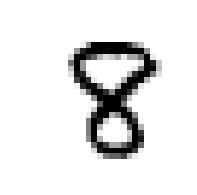

In [32]:
x.show(), y

Since here in the dataset we only have number, and that too the quality is not really great, it doesn't make sense to perform traditional transforms like rotation and zooming. So we just use random padding here

In [10]:
tfms = ([*rand_pad(padding = 3, size = 28, mode = 'zeros')], []) # This last '[]' means that no transformations on the validation set

In [11]:
ll = ll.transform(tfms)

In [12]:
bs = 128

In [13]:
# here, we're not using imagenet_stats since we're not using a pretrained model
data = ll.databunch(bs = bs).normalize()

In [16]:
data.train_ds

LabelList
y: CategoryList (60000 items)
[Category 8, Category 8, Category 8, Category 8, Category 8]...
Path: /home/jupyter/.fastai/data/mnist_png
x: ImageItemList (60000 items)
[Image (1, 28, 28), Image (1, 28, 28), Image (1, 28, 28), Image (1, 28, 28), Image (1, 28, 28)]...
Path: /home/jupyter/.fastai/data/mnist_png

In [14]:
x, y = data.train_ds[0]

8


(None, None)

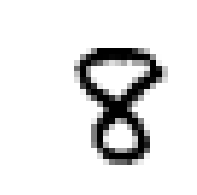

In [41]:
x.show(), print(y)

In [15]:
def _plot(i, j, ax):
    data.train_ds[0][0].show(ax, cmap = 'gray')

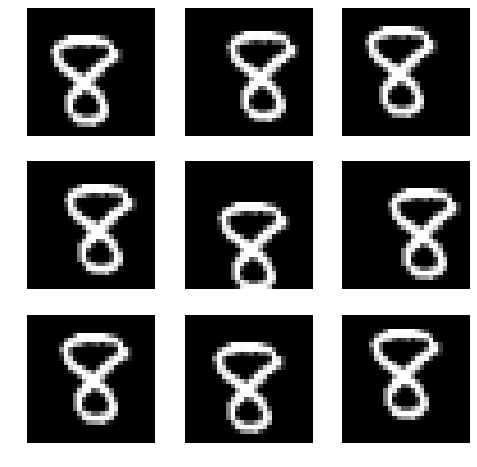

In [19]:
plot_multi(_plot, 3, 3, figsize = (8,8))

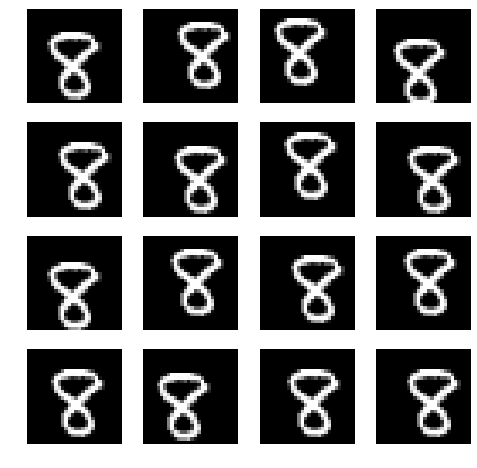

In [44]:
plot_multi(_plot, 4, 4, figsize = (8,8))

In [16]:
xb, yb = data.one_batch()

In [17]:
xb.shape, yb.shape

(torch.Size([128, 1, 28, 28]), torch.Size([128]))

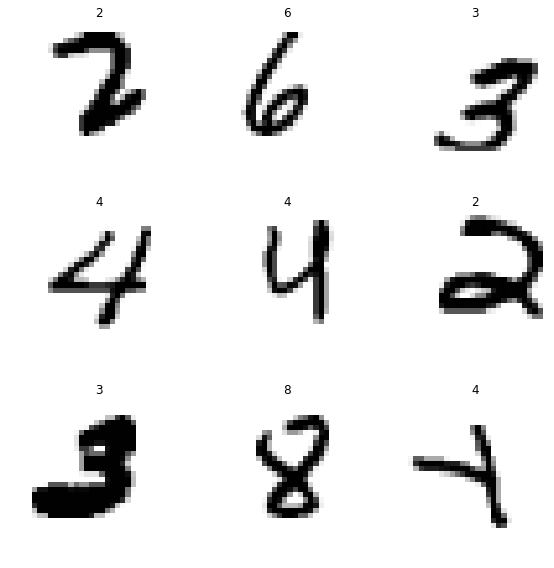

In [49]:
data.show_batch(rows = 3, figsize = (8,8))

## Basic CNN with BatchNorm

In [18]:
def conv(ni, nf):
    return nn.Conv2d(ni, nf, kernel_size=3, stride = 2, padding = 1)
# Here ni, nf = no. of input channels, no. of output channels, stride = how many pixels to move over

Define a simple model.
Here, the number in #comments is the final output size after the kernel pass-through. Since stride is 2 here, the size will get halved each time

In [19]:
model = nn.Sequential(
        conv(1, 8), #14
        nn.BatchNorm2d(8),
        nn.ReLU(),
        conv(8, 16), #7
        nn.BatchNorm2d(16),
        nn.ReLU(),
        conv(16, 32), #4
        nn.BatchNorm2d(32),
        nn.ReLU(),
        conv(32, 16), #2
        nn.BatchNorm2d(16),
        nn.ReLU(),
        conv(16, 10), #1
        nn.BatchNorm2d(10),
        Flatten() # Removes (1,1) grid
)

In [20]:
learn = Learner(data, model, loss_func = nn.CrossEntropyLoss(), metrics = accuracy)

In [24]:
print(learn.summary())

Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [128, 8, 14, 14]     80         True      
______________________________________________________________________
BatchNorm2d          [128, 8, 14, 14]     16         True      
______________________________________________________________________
ReLU                 [128, 8, 14, 14]     0          False     
______________________________________________________________________
Conv2d               [128, 16, 7, 7]      1168       True      
______________________________________________________________________
BatchNorm2d          [128, 16, 7, 7]      32         True      
______________________________________________________________________
ReLU                 [128, 16, 7, 7]      0          False     
______________________________________________________________________
Conv2d               [128, 32, 4, 4]      4640       True      
______________________________________________________________

Test that it works correctly by performing on one item mini-batch

In [21]:
xb = xb.cuda()

In [22]:
model(xb).shape

torch.Size([128, 10])

That's correct! So now, we'll go through the whole model

In [23]:
learn.lr_find(end_lr = 100)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


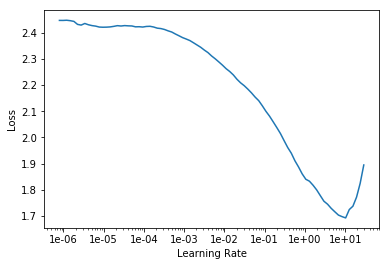

In [24]:
learn.recorder.plot()

In [25]:
learn.fit_one_cycle(3, max_lr = 0.1)

epoch,train_loss,valid_loss,accuracy
1,0.228860,0.327517,0.893400
2,0.138693,0.081991,0.973500
3,0.075648,0.040683,0.987700


We already got a 98% accuracy using this simple model!

# Refactoring the code

In [26]:
def conv2(ni, nf):
    return conv_layer(ni, nf, stride = 2)
# conv_layer combines Conv->BatchNorm->ReLU

In [27]:
model = nn.Sequential(
        conv2(1, 8),
        conv2(8, 16),
        conv2(16, 32),
        conv2(32, 16),
        conv2(16, 10),
        Flatten())

In [29]:
learn = Learner(data, model, loss_func = nn.CrossEntropyLoss(), metrics = accuracy)

In [30]:
learn.fit_one_cycle(10, max_lr = 0.1)

epoch,train_loss,valid_loss,accuracy
1,0.231057,0.163609,0.948700
2,0.188271,0.149986,0.951400
3,0.179857,0.327748,0.892400
4,0.144472,0.143887,0.951500
5,0.119267,0.111295,0.965100
6,0.116604,0.101045,0.967500
7,0.088748,0.066142,0.979400
8,0.070002,0.041828,0.985500
9,0.054624,0.031228,0.989700
10,0.048541,0.029869,0.990400


 # Adding a residual connection

A residual connection is where the input itself is added to the conv layer and that becomes the final output. See the original paper for details : https://arxiv.org/pdf/1512.03385.pdf 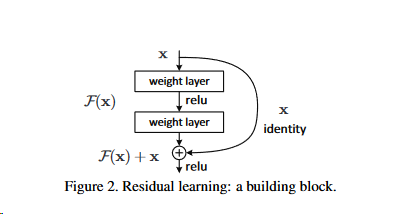

In [31]:
class ResBlock(nn.Module):
    def __init__(self, nf):
        super().__init__()
        self.conv1 = conv_layer(nf, nf)
        self.conv2 = conv_layer(nf, nf)
        
    def forward(self, x):
        return x + self.conv2(self.conv1(x))

In [35]:
import fastai.layers

In [38]:
help(ResBlock)

Help on class ResBlock in module __main__:

class ResBlock(torch.nn.modules.module.Module)
 |  ResBlock(nf)
 |  
 |  Base class for all neural network modules.
 |  
 |  Your models should also subclass this class.
 |  
 |  Modules can also contain other Modules, allowing to nest them in
 |  a tree structure. You can assign the submodules as regular attributes::
 |  
 |      import torch.nn as nn
 |      import torch.nn.functional as F
 |  
 |      class Model(nn.Module):
 |          def __init__(self):
 |              super(Model, self).__init__()
 |              self.conv1 = nn.Conv2d(1, 20, 5)
 |              self.conv2 = nn.Conv2d(20, 20, 5)
 |  
 |          def forward(self, x):
 |             x = F.relu(self.conv1(x))
 |             return F.relu(self.conv2(x))
 |  
 |  Submodules assigned in this way will be registered, and will have their
 |  parameters converted too when you call :meth:`to`, etc.
 |  
 |  Method resolution order:
 |      ResBlock
 |      torch.nn.modules.module

In [39]:
model = nn.Sequential(
    conv2(1,8),
    ResBlock(8),
    conv2(8, 16),
    ResBlock(16),
    conv2(16, 32),
    ResBlock(32),
    conv2(32, 16),
    ResBlock(16),
    conv2(16, 10),
    Flatten()
)

In [40]:
learn = Learner(data, model, loss_func = nn.CrossEntropyLoss(), metrics = accuracy)

In [41]:
learn.lr_find(end_lr = 100)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


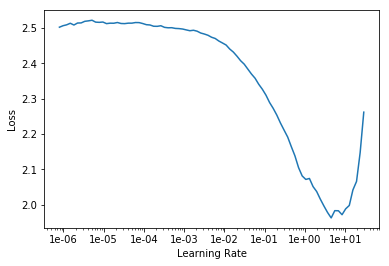

In [42]:
learn.recorder.plot()

Let's refactor it a bit more

In [43]:
def conv_and_res(ni, nf):
    return nn.Sequential(conv2(ni, nf), ResBlock(nf))

In [44]:
model = nn.Sequential(
    conv_and_res(1, 8),
    conv_and_res(8, 16),
    conv_and_res(16, 32),
    conv_and_res(32, 16),
    conv2(16, 10),
    Flatten()
)

In [45]:
learn = Learner(data, model, loss_func = nn.CrossEntropyLoss(), metrics = accuracy)

In [46]:
learn.lr_find(end_lr = 100)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


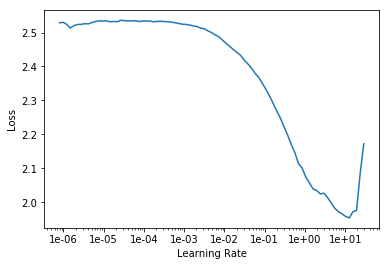

In [47]:
learn.recorder.plot()

In [48]:
learn.fit_one_cycle(12, max_lr = 0.05)

epoch,train_loss,valid_loss,accuracy
1,0.241618,0.154082,0.958800
2,0.131022,0.162454,0.951300
3,0.114257,0.216535,0.941100
4,0.089451,0.072209,0.979000
5,0.074435,0.153258,0.951600
6,0.063884,0.201249,0.935500
7,0.054343,0.039707,0.987100
8,0.041435,0.026844,0.991700
9,0.035794,0.026639,0.991500
10,0.029136,0.018331,0.993600


In [50]:
print(learn.summary())

Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [128, 8, 14, 14]     72         True      
______________________________________________________________________
ReLU                 [128, 8, 14, 14]     0          False     
______________________________________________________________________
BatchNorm2d          [128, 8, 14, 14]     16         True      
______________________________________________________________________
Conv2d               [128, 8, 14, 14]     576        True      
______________________________________________________________________
ReLU                 [128, 8, 14, 14]     0          False     
______________________________________________________________________
BatchNorm2d          [128, 8, 14, 14]     16         True      
______________________________________________________________________
Conv2d               [128, 8, 14, 14]     576        True      
______________________________________________________________